In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, log_loss, r2_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaseEnsemble, VotingClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [4]:
test.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [7]:
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [9]:
y_train = train['count']
X_train = train.drop(['datetime', 'count', 'registered', 'casual'], axis=1)
X_test = test.drop('datetime', axis=1)
print(X_train.columns)

print(X_test.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')


In [30]:
catboost = CatBoostRegressor(random_state=24, logging_level='Silent', cat_features=['season', 'weather'])
rf = RandomForestRegressor(random_state=24)

In [13]:
catboost.fit(X_train, y_train)

In [15]:
y_pred = catboost.predict(X_test)

season  holiday  workingday  weather   temp   atemp  humidity  windspeed
0       1        0           1        1  10.66  11.365        56    26.0027
1       1        0           1        1  10.66  13.635        56     0.0000
2       1        0           1        1  10.66  13.635        56     0.0000
3       1        0           1        1  10.66  12.880        56    11.0014
4       1        0           1        1  10.66  12.880        56    11.0014

In [26]:

submit = pd.DataFrame({'datetime':pd.to_datetime(test['datetime']),
                       'count':y_pred})
submit['count'] = submit['count'].clip(lower = 0)
submit.to_csv("cat.csv", index=False)

In [32]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
submit = pd.DataFrame({'datetime':pd.to_datetime(test['datetime']),
                       'count':y_pred})
submit['count'] = submit['count'].clip(lower = 0)
submit.to_csv("rf.csv", index=False)

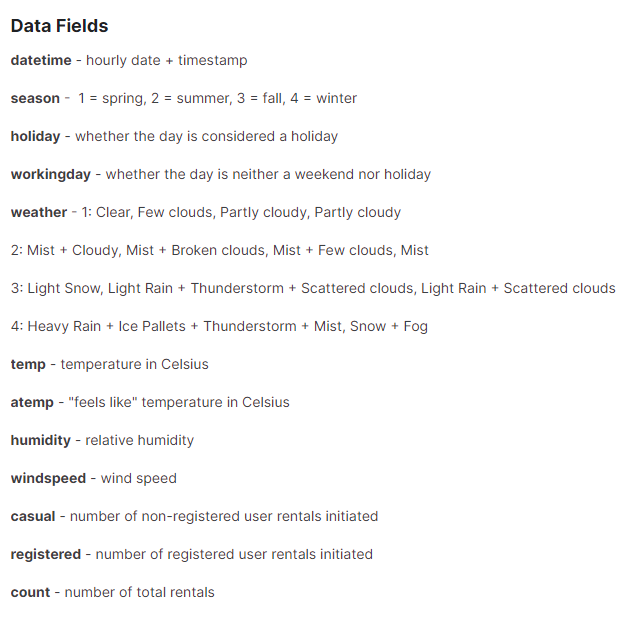

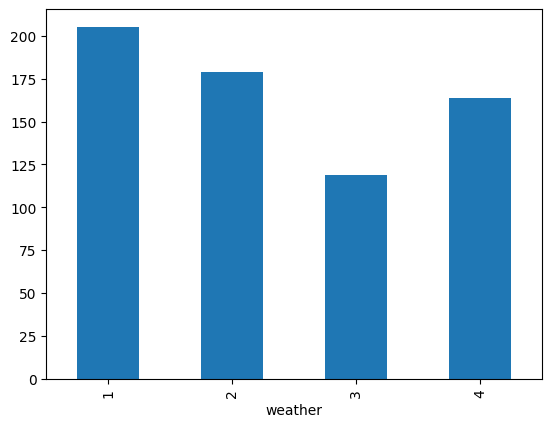

In [49]:
train.groupby('weather')['count'].mean().plot(kind='bar')
plt.show()

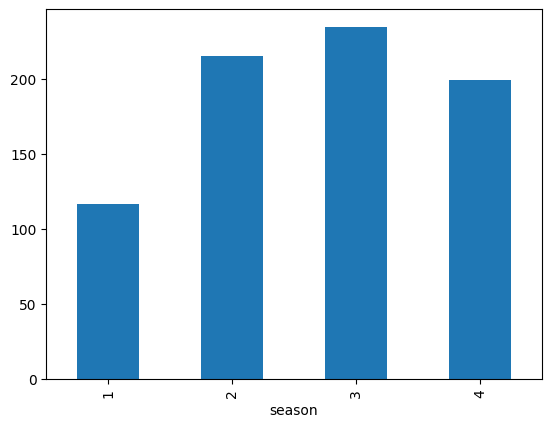

In [50]:
train.groupby('season')['count'].mean().plot(kind='bar')
plt.show()

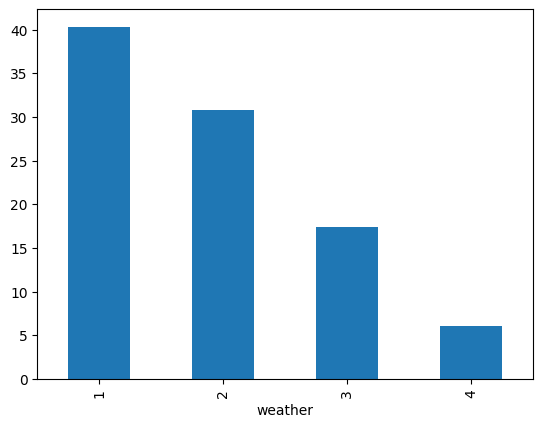

In [51]:
train.groupby('weather')['casual'].mean().plot(kind='bar')
plt.show()

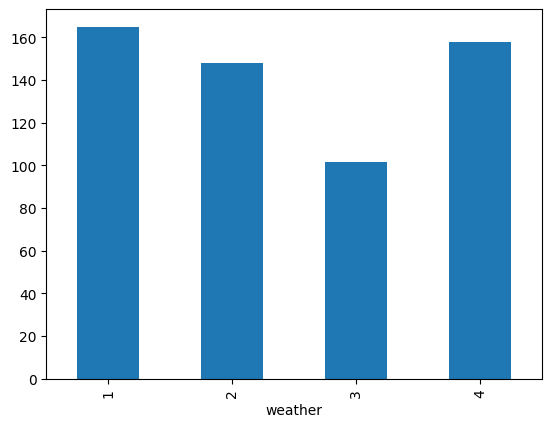

In [52]:
train.groupby('weather')['registered'].mean().plot(kind='bar')
plt.show()

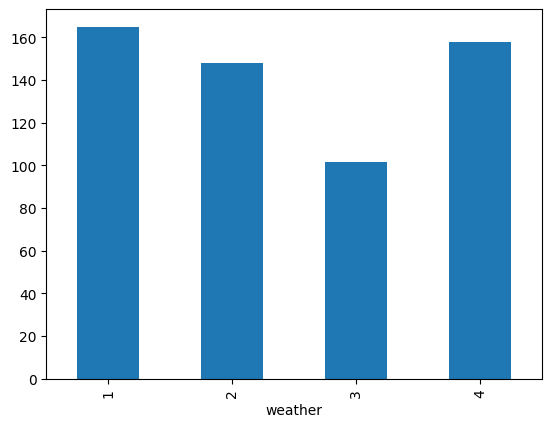

In [53]:
train.groupby('weather')['registered'].mean().plot(kind='bar')
plt.show()

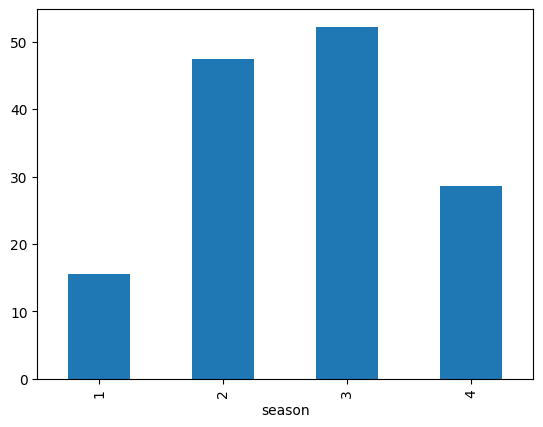

In [55]:
train.groupby('season')['casual'].mean().plot(kind='bar')
plt.show()

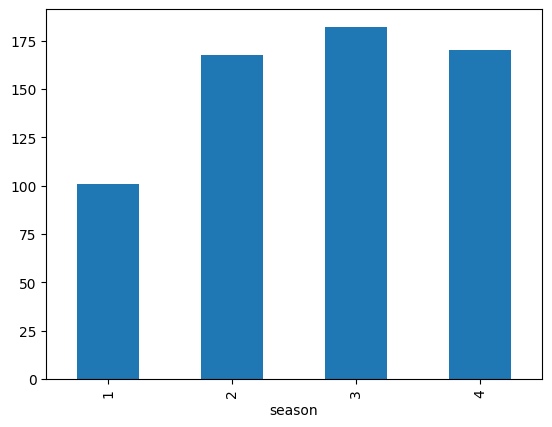

In [54]:
train.groupby('season')['registered'].mean().plot(kind='bar')
plt.show()


In [38]:
y_train = train['count']
X_train = train.drop(['datetime', 'count', 'registered', 'casual'], axis=1)
X_test = test.drop('datetime', axis=1)

regist = train['registered']
casual = train['casual'] 

In [39]:
cat_reg = CatBoostRegressor(random_state=24, logging_level='Silent', cat_features=['season', 'weather'])
cat_cau = CatBoostRegressor(random_state=24, logging_level='Silent', cat_features=['season', 'weather'])


In [40]:
cat_cau.fit(X_train, casual)

In [41]:
y_pred_cau = cat_cau.predict(X_test)

In [43]:
y_pred_cau[y_pred_cau<0] = 0
y_pred_cau[y_pred_cau<0]=0

array([], dtype=float64)

In [44]:
cat_reg.fit(X_train, casual)

In [45]:
y_pred_reg = cat_reg.predict(X_test)

In [46]:
y_pred_reg[y_pred_reg<0] = 0
y_pred_reg[y_pred_reg<0]

array([], dtype=float64)

In [48]:
submit = pd.DataFrame({'datetime':pd.to_datetime(test['datetime']),
                       'count':y_pred_reg+y_pred_cau})
submit['count'] = submit['count'].clip(lower = 0)
submit.to_csv("cau_reg.csv", index=False)

### Sepearate Datetime

In [91]:
dt_train = pd.read_csv('train.csv', parse_dates=['datetime'])
dt_test = pd.read_csv('test.csv', parse_dates=['datetime'])
print(dt_train.head())
dt_train['year'] = dt_train['datetime'].dt.year
dt_train['month'] = dt_train['datetime'].dt.month
dt_train['day'] = dt_train['datetime'].dt.day
dt_train['hour'] = dt_train['datetime'].dt.hour
# dt_train['weekday'] = dt_train['datetime'].dt.weekday

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [92]:
y_train = dt_train['count']
X_train = dt_train.drop(['datetime', 'count', 'registered', 'casual'], axis=1)

dt_test['year'] = dt_test['datetime'].dt.year
dt_test['month'] = dt_test['datetime'].dt.month
dt_test['day'] = dt_test['datetime'].dt.day
dt_test['hour'] = dt_test['datetime'].dt.hour
# dt_test['weekday'] = dt_test['datetime'].dt.weekday
X_test = dt_test.drop('datetime', axis=1)

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   year        10886 non-null  int32  
 9   month       10886 non-null  int32  
 10  day         10886 non-null  int32  
 11  hour        10886 non-null  int32  
 12  weekday     10886 non-null  int32  
dtypes: float64(3), int32(5), int64(5)
memory usage: 893.1 KB


In [93]:
cat_reg = CatBoostRegressor(random_state=24, logging_level='Silent', cat_features=['season', 'weather'])
cat_cau = CatBoostRegressor(random_state=24, logging_level='Silent', cat_features=['season', 'weather'])


In [94]:
cat_cau.fit(X_train, casual)

In [95]:
y_pred_cau = cat_cau.predict(X_test)
y_pred_cau[y_pred_cau<0] = 0
y_pred_cau[y_pred_cau<0]=0

In [96]:
cat_reg.fit(X_train, regist)

In [97]:
y_pred_reg = cat_reg.predict(X_test)
y_pred_reg[y_pred_reg<0] = 0
y_pred_reg[y_pred_reg<0]

array([], dtype=float64)

In [98]:
y_pred = y_pred_reg+y_pred_cau
y_pred = y_pred.round()

In [99]:

submit = pd.DataFrame({'datetime':pd.to_datetime(dt_test['datetime']),
                       'count':y_pred})
submit[submit['count']<0] = 0
submit.to_csv("date.csv", index=False)

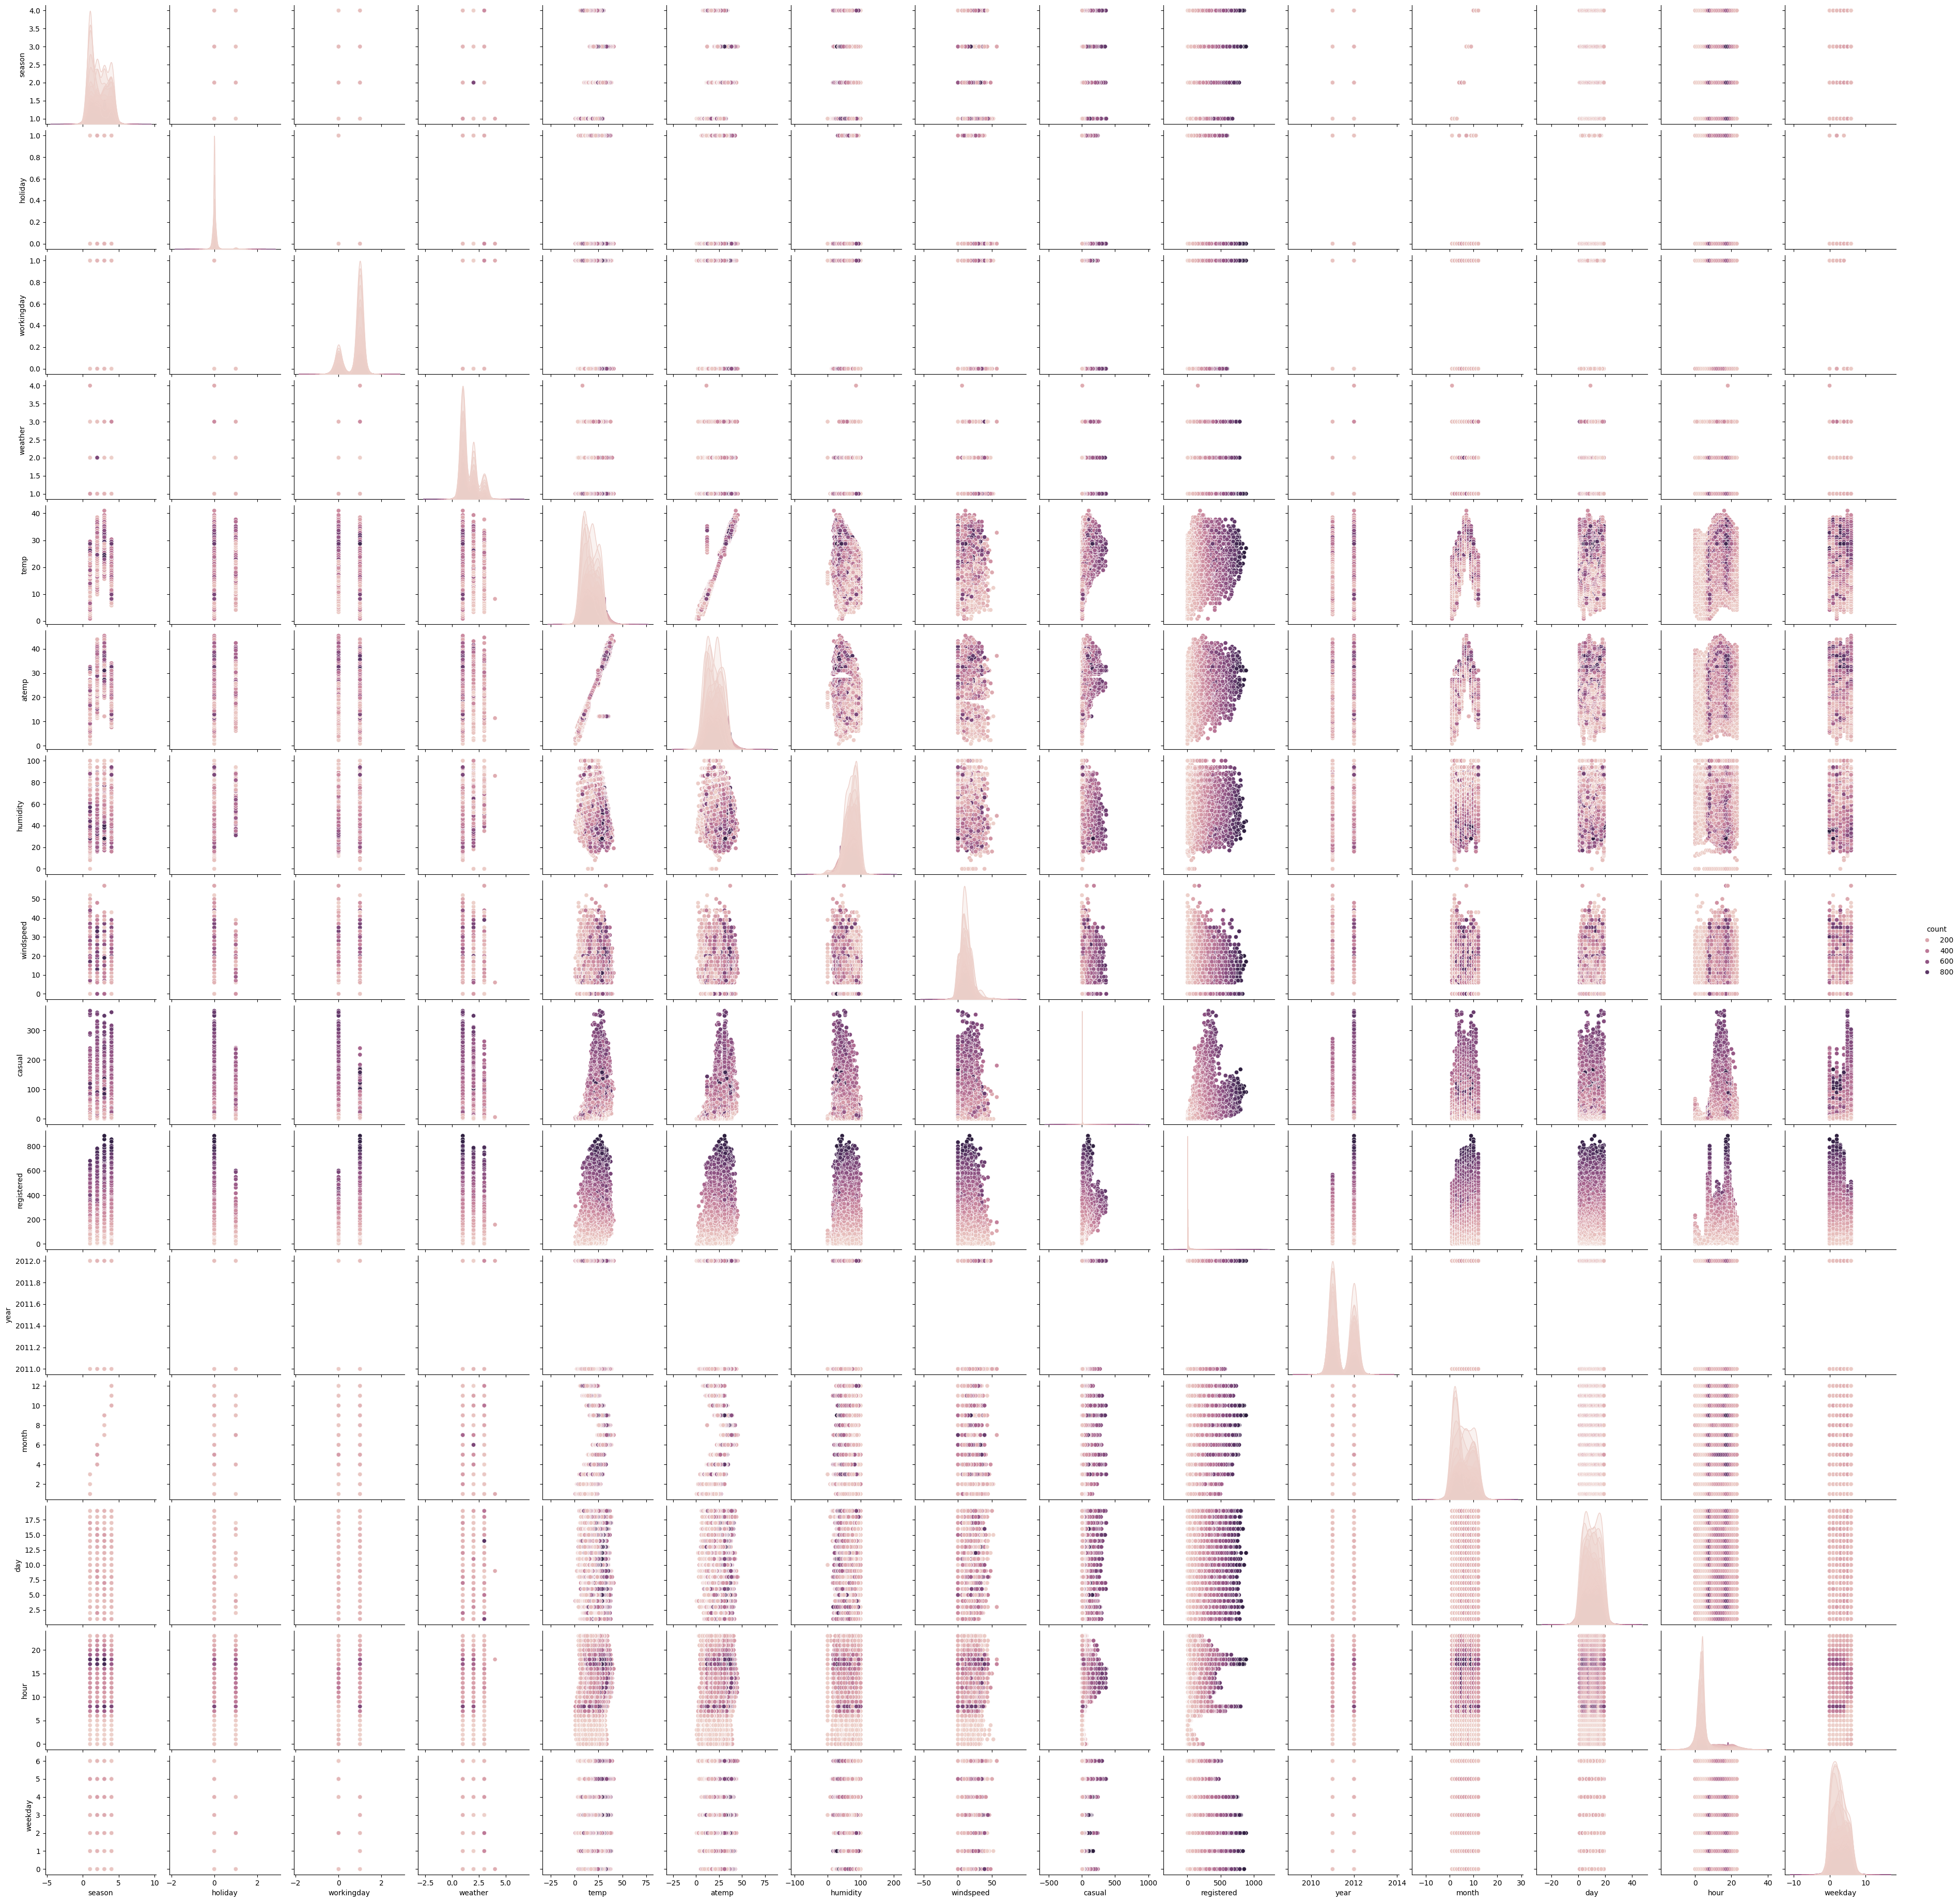

In [85]:
sns.pairplot(data=dt_train, hue='count')
plt.show()

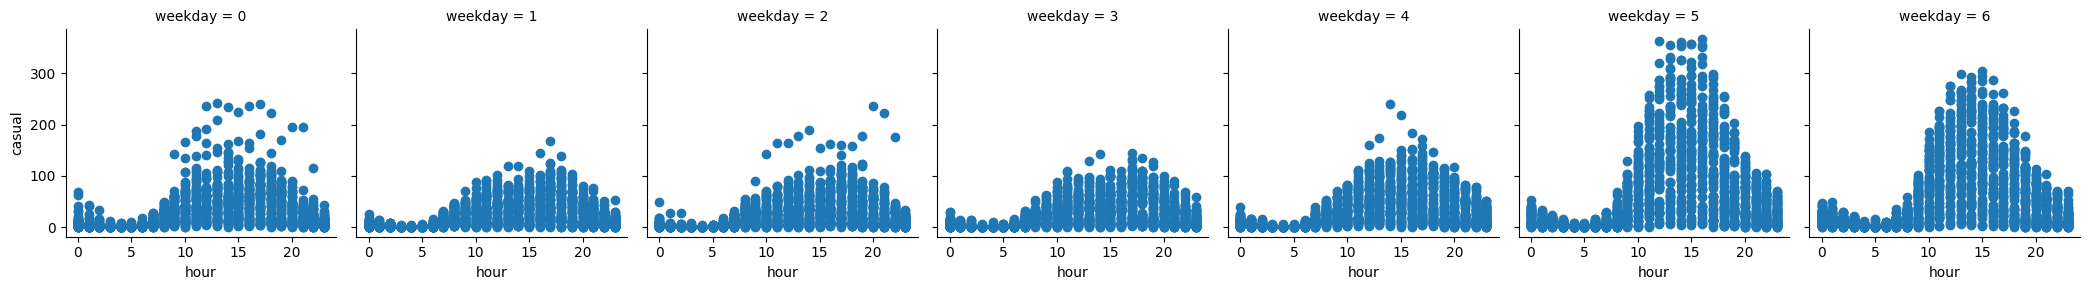

In [86]:
g = sns.FacetGrid(data=dt_train, col='weekday')
g.map(plt.scatter, 'hour', 'casual')
plt.show()

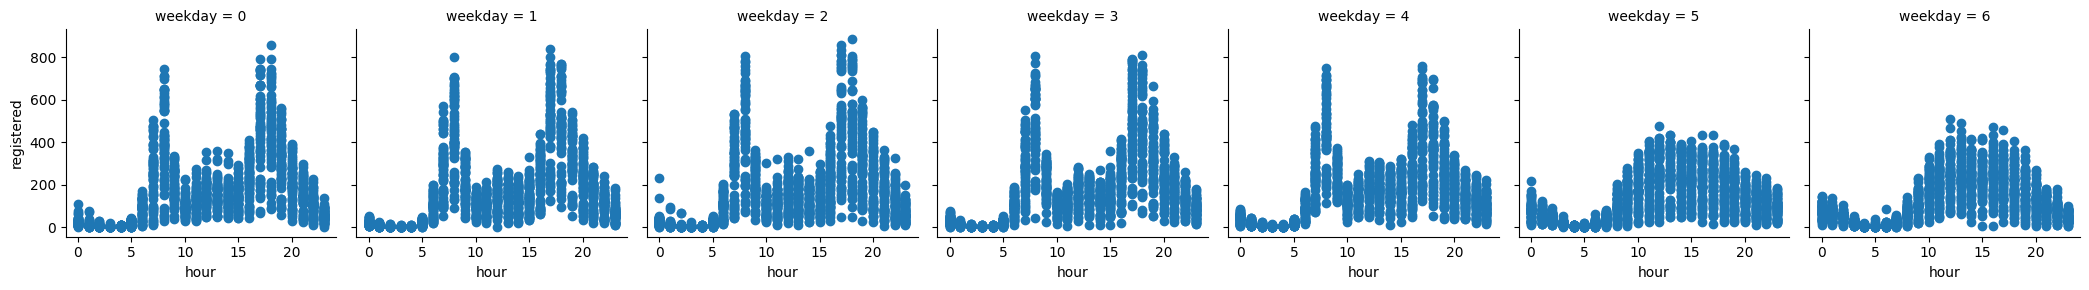

In [87]:
g = sns.FacetGrid(data=dt_train, col='weekday')
g.map(plt.scatter, 'hour', 'registered')
plt.show()

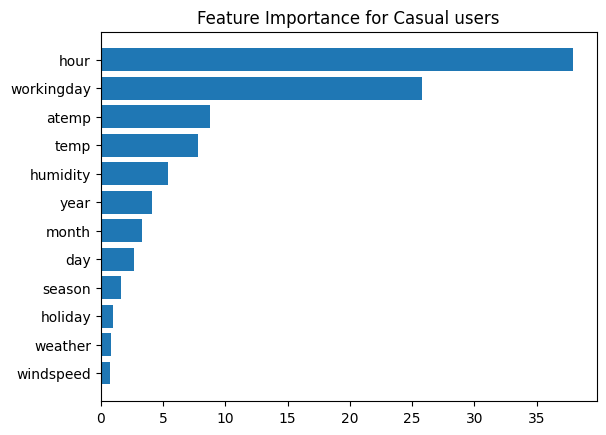

In [104]:
df_imp = pd.DataFrame({'Feature':list(X_train.columns), 'Importance': cat_cau.feature_importances_})
df_imp.sort_values('Importance', inplace=True)
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.title('Feature Importance for Casual users')
plt.show()

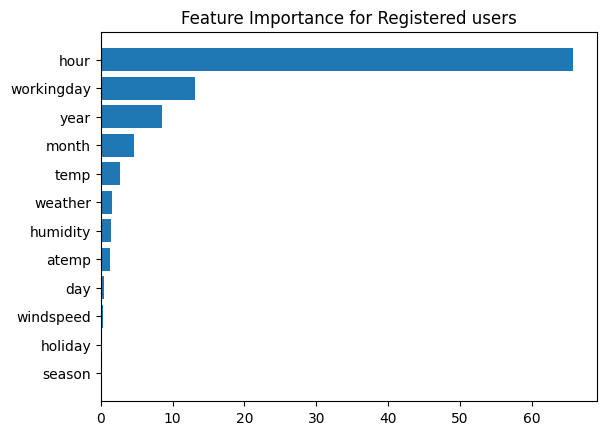

In [105]:
df_imp = pd.DataFrame({'Feature':list(X_train.columns), 'Importance': cat_reg.feature_importances_})
df_imp.sort_values('Importance', inplace=True)
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.title('Feature Importance for Registered users')
plt.show()

In [106]:
print(X_train.columns, X_test.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object') Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')
